In [1]:
import pyshtools as pysh
import matplotlib.pyplot as plt
import numpy as np
from pyshtools import *

from cartopy import crs as ccrs
import pygmt
from palettable import scientific as scm
from pyshtools import constants

In [2]:
pysh.utils.figstyle(rel_width=0.75)
%config InlineBackend.figure_format = 'retina' 

In [3]:
clm=pysh.SHGravCoeffs.from_file('gggrx_1200a_sha.tab', format = 'shtools', lmax = 660)

In [4]:
clm.info()

kind = 'real'
normalization = '4pi'
csphase = 1
lmax = 660
GM (m3 / s2) = 4902.8001224453
r0 (m) = 1738.0
Omega (rad / s) = None
error_kind = None
header = ['1.7380000000000000e+03', '4.9028001224453001e+03', '6.4536052689015518e-15', '1200', '1200', '1', '0.0000000000000000e+00', '0.0000000000000000e+00']
header2 = None
name = None
epoch = None


In [5]:
#clm.to_file('1200a_660.tab', format= 'shtools')
clm?


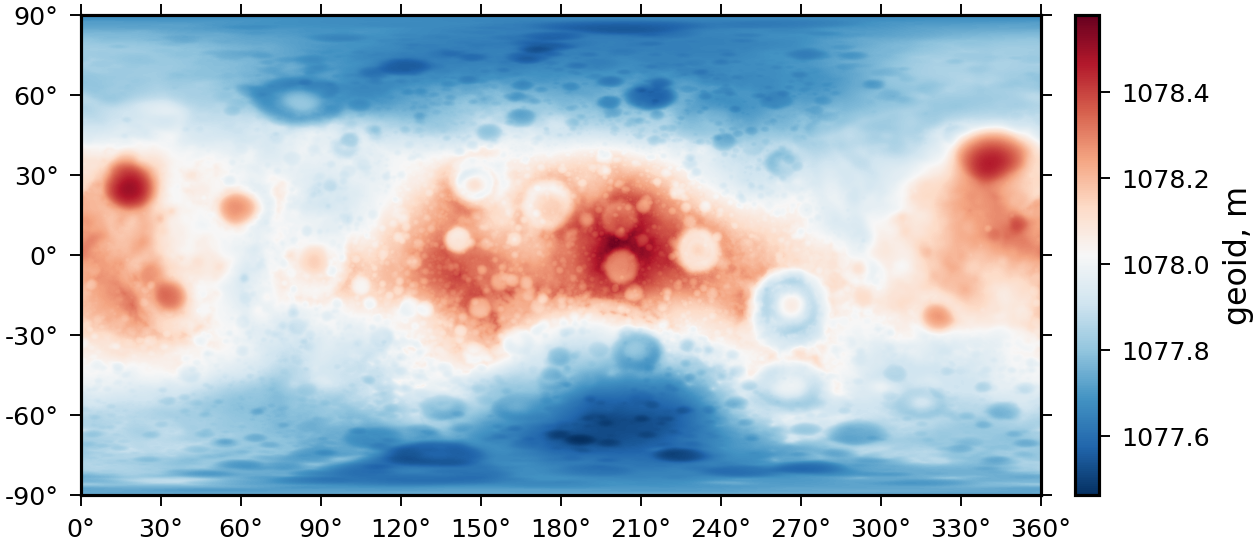

In [6]:
pysh.constants.Moon.omega = None
#u0 = 4902800122445.3/1738000.0
u0 = 4902.8001224453/1738.0
moon_geoid = clm.geoid(u0, 660)
fig, ax = moon_geoid.plot(cmap='RdBu_r', show=False)

In [7]:
moon_geoid.info()

grid = 'DH'
sampling = 2
nlat = 1323
nlon = 2645
n = 1322
sampling = 2
extend = True
lmax = 660
lmax_calc = 660
gm (m3 / s2) = 4.902800e+03
reference potential (m2 /s2) = 2.820944e+00
a (m)= 6.600000e+02
f = 0.000000e+00
omega (rad / s) = 0.0
radius of Taylor expansion (m) = 1.738000e+03
order of expansion = 2
units = 'm'
epoch = None


In [8]:
moon_geoid?

In [9]:
moon_geoid=moon_geoid.to_xarray()

In [10]:
moon_geoid?
np.save('moon_geoid.array', moon_geoid) #saving the geoid file as an numpy array
np.savetxt('data.csv', moon_geoid, delimiter=',') #saving as CSV file

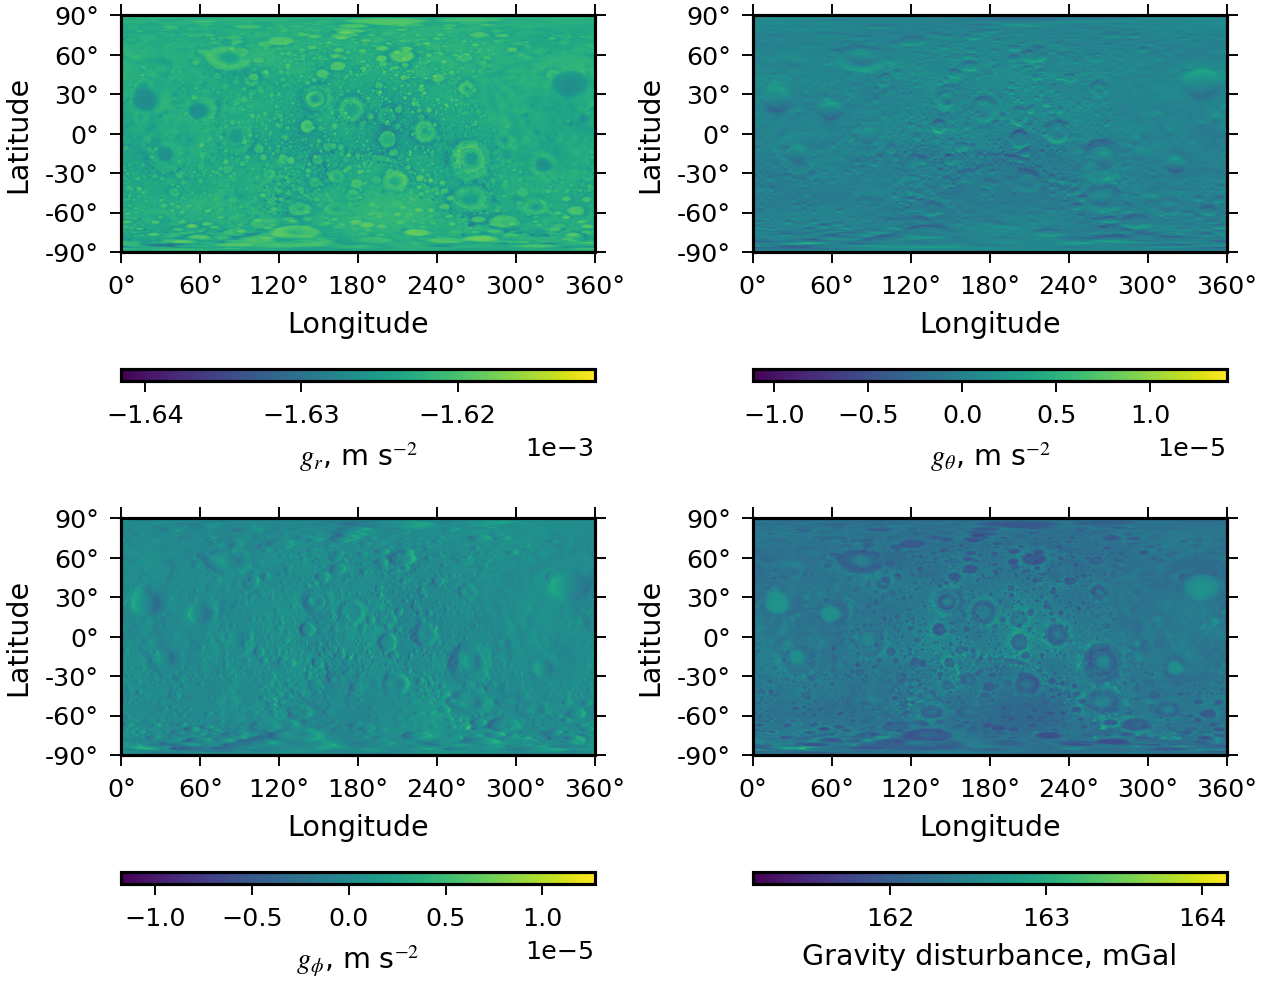

In [11]:
grid = clm.expand()
fig, ax = grid.plot()


here, expand() method. calculate grid of the gravitational potential, the three vector components of the gravity field and the total gravity disturbance.
where vector components correspond to the spherical coordinate unit vectors:
r (rad - radial component of the gravitational acceleration), 
θ (theta - component of the gravitational acceleration)
ϕ (phi- component of the gravitional acceleration evaluated on an ellipsoid)
and not components that are perpendicular to the reference ellipsoid. By default, the normal gravity is removed from the total gravitational acceleration, yielding the gravity disturbance.


In [12]:
grid.total?
totalGrid = grid.total
latitude = totalGrid.lats()
print(latitude)
#grav.plot_total(cmap='RdBu_r',cmap_limits=[-400, 600],show=False)
#clm.expand()?
#lat = grid.lats()
#clm= clm.to_array()
#print(clm)

[ 90.          89.86384266  89.72768533 ... -89.72768533 -89.86384266
 -90.        ]


In [13]:
longitude = totalGrid.lons()
longitude?
print(longitude)

[0.00000000e+00 1.36157337e-01 2.72314675e-01 ... 3.59727685e+02
 3.59863843e+02 3.60000000e+02]


In [14]:
#infile = 'gggrx_1200a_dist_l660.tif'
#coeffs1, lmax = shio.shread(infile)
#shape = pysh.SHGravCoeffs.from_file('gggrx_1200a_dist_l660.tif')

mycmap = scm.diverging.Vik_20.mpl_colormap
fig, ax = totalGrid.plotgmt(projection=ccrs.Mollweide(central_longitude=240.),
                    cmap = 'nuuk',
                    cmap_limits=[-1,500],
                    colorbar='right',
                    cb_label='Elevation',
                    cb_ylabel='km',
                    cb_triangles='both',
                    grid=True,
                    shading = True)


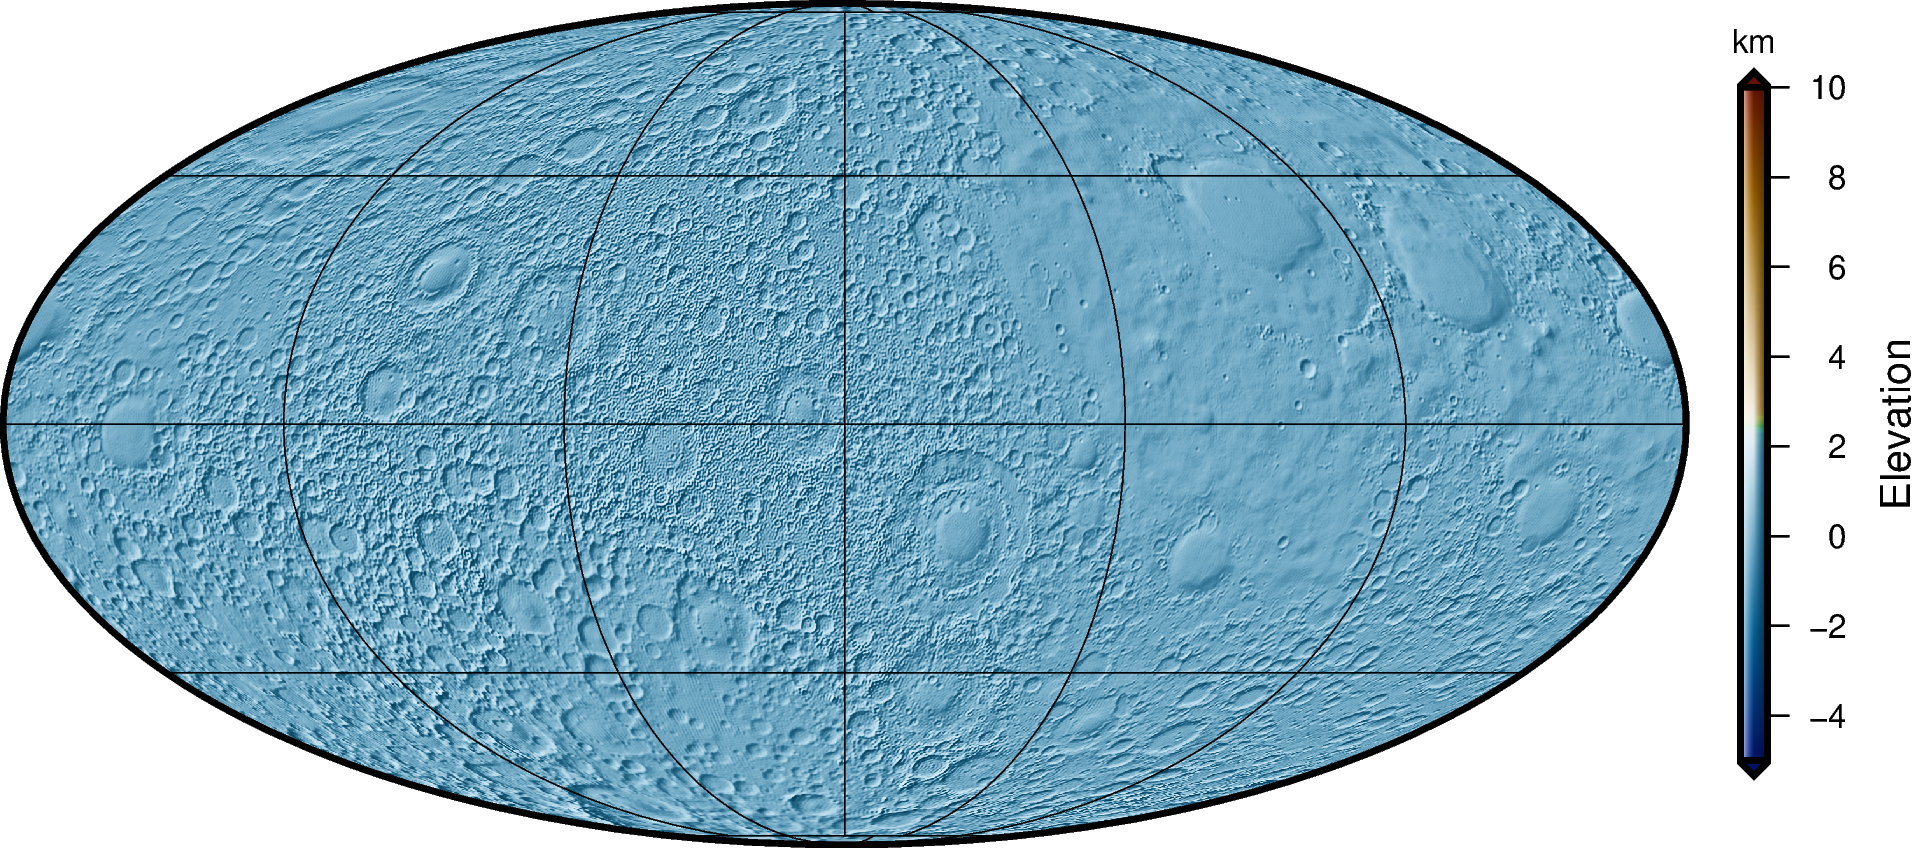

In [18]:
fig = totalGrid.plotgmt(projection='mollweide',
                   central_longitude=240.,
                   cmap='vik',
                   cmap_limits=[-5, 10],
                   tick_interval=None,
                   colorbar='right',
                   cb_label='Elevation',
                   cb_ylabel='km',
                   cb_triangles='both',
                   cb_tick_interval=2,
                   grid=[60, 45],
                   shading=True)
fig.show()